In [1]:
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv('../input/ad_click_dataset.csv')
print(df.info)
print(df.isnull().sum())
print(df.head())

<bound method DataFrame.info of         id full_name   age      gender device_type ad_position  \
0      670   User670  22.0         NaN     Desktop         Top   
1     3044  User3044   NaN        Male     Desktop         Top   
2     5912  User5912  41.0  Non-Binary         NaN        Side   
3     5418  User5418  34.0        Male         NaN         NaN   
4     9452  User9452  39.0  Non-Binary         NaN         NaN   
...    ...       ...   ...         ...         ...         ...   
9995  8510  User8510   NaN         NaN      Mobile         Top   
9996  7843  User7843   NaN      Female     Desktop      Bottom   
9997  3914  User3914   NaN        Male      Mobile        Side   
9998  7924  User7924   NaN         NaN     Desktop         NaN   
9999  3056  User3056  44.0        Male      Tablet         Top   

     browsing_history time_of_day  click  
0            Shopping   Afternoon      1  
1                 NaN         NaN      1  
2           Education       Night      1  
3  

In [3]:
for columns in df.columns:
    unique_value = df[columns].unique()
    print(f'unique values in column {columns}:')
    print(unique_value)
    print('\n')

unique values in column id:
[ 670 3044 5912 ... 7843 3914 3056]


unique values in column full_name:
['User670' 'User3044' 'User5912' ... 'User7843' 'User3914' 'User3056']


unique values in column age:
[22. nan 41. 34. 39. 26. 40. 47. 19. 56. 24. 52. 42. 36. 43. 62. 45. 37.
 31. 58. 59. 48. 38. 49. 30. 46. 54. 44. 27. 57. 28. 51. 25. 61. 32. 64.
 23. 55. 21. 20. 35. 53. 33. 29. 63. 50. 18. 60.]


unique values in column gender:
[nan 'Male' 'Non-Binary' 'Female']


unique values in column device_type:
['Desktop' nan 'Mobile' 'Tablet']


unique values in column ad_position:
['Top' 'Side' nan 'Bottom']


unique values in column browsing_history:
['Shopping' nan 'Education' 'Entertainment' 'Social Media' 'News']


unique values in column time_of_day:
['Afternoon' nan 'Night' 'Evening' 'Morning']


unique values in column click:
[1 0]




In [4]:
age_imputer = SimpleImputer(strategy = 'mean')
df['age'] = age_imputer.fit_transform(df[['age']])

In [5]:
categorical_columns = ['gender','device_type','ad_position','browsing_history','time_of_day']
categorical_imputer = SimpleImputer(strategy = 'most_frequent')

df[categorical_columns] = categorical_imputer.fit_transform(df[categorical_columns])

In [6]:
print(df.isnull().sum())
print(df.head())

id                  0
full_name           0
age                 0
gender              0
device_type         0
ad_position         0
browsing_history    0
time_of_day         0
click               0
dtype: int64
     id full_name        age      gender device_type ad_position  \
0   670   User670  22.000000      Female     Desktop         Top   
1  3044  User3044  40.197363        Male     Desktop         Top   
2  5912  User5912  41.000000  Non-Binary     Desktop        Side   
3  5418  User5418  34.000000        Male     Desktop      Bottom   
4  9452  User9452  39.000000  Non-Binary     Desktop      Bottom   

  browsing_history time_of_day  click  
0         Shopping   Afternoon      1  
1    Entertainment     Morning      1  
2        Education       Night      1  
3    Entertainment     Evening      1  
4     Social Media     Morning      0  


In [7]:
print(df.describe(include = [float, int]))
print(df.describe(include = [object]))


                age
count  10000.000000
mean      40.197363
std        9.496059
min       18.000000
25%       38.000000
50%       40.197363
75%       40.197363
max       64.000000
       full_name  gender device_type ad_position browsing_history time_of_day
count      10000   10000       10000       10000            10000       10000
unique      4000       3           3           3                5           4
top     User1171  Female     Desktop      Bottom    Entertainment     Morning
freq          25    6527        4754        4817             5957        4126


EDA

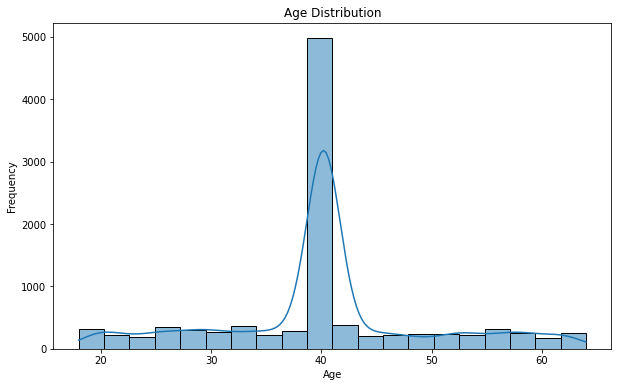

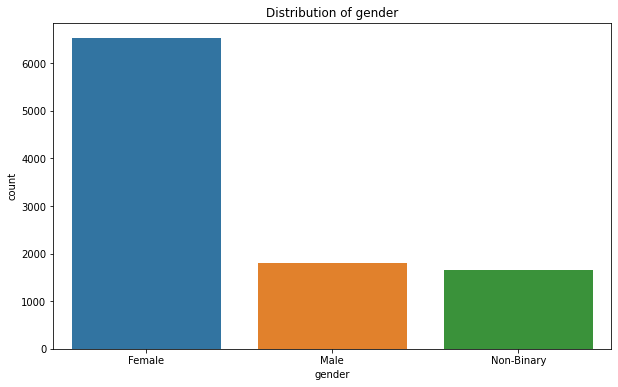

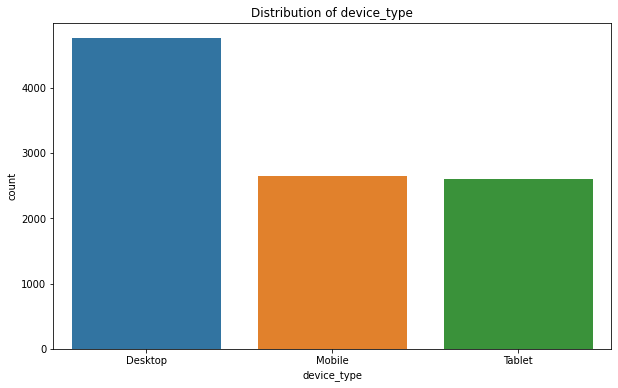

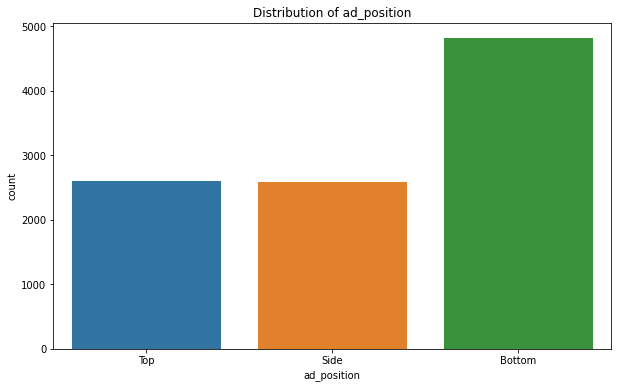

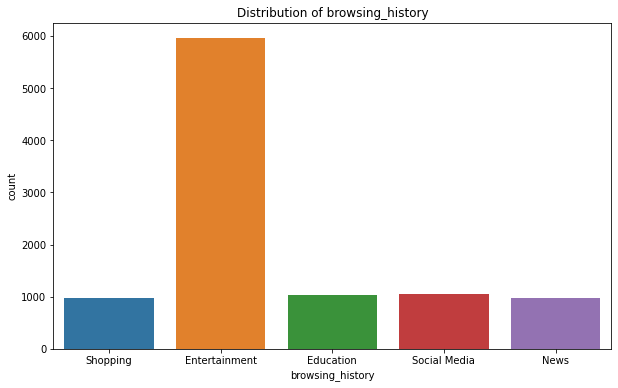

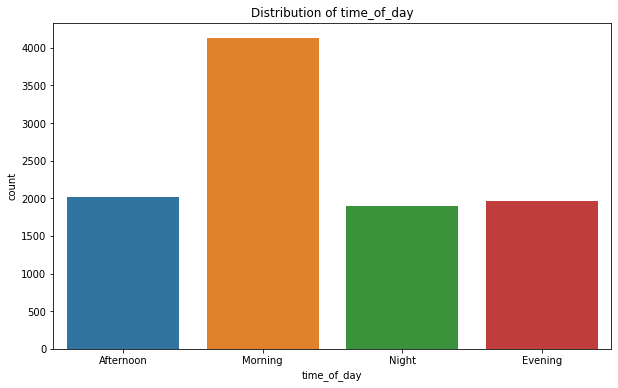

In [8]:
plt.figure(figsize = (10,6))
sns.histplot(df['age'], bins = 20, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

for feature in categorical_columns:
    plt.figure(figsize = (10,6))
    sns.countplot(x =feature, data= df)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('count')
    plt.show()

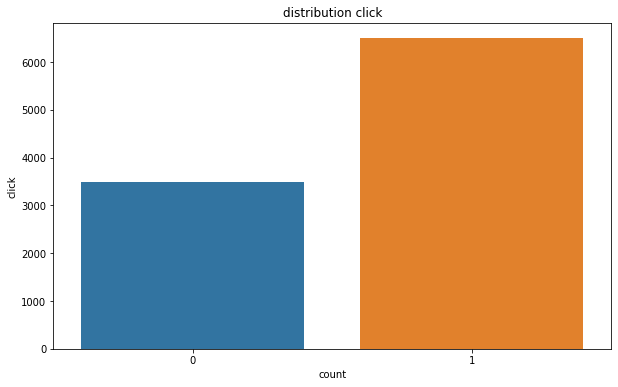

In [9]:
plt.figure(figsize= (10,6))
sns.countplot(x = 'click', data= df)
plt.title("distribution click")
plt.xlabel("count")
plt.ylabel('click')
plt.show()


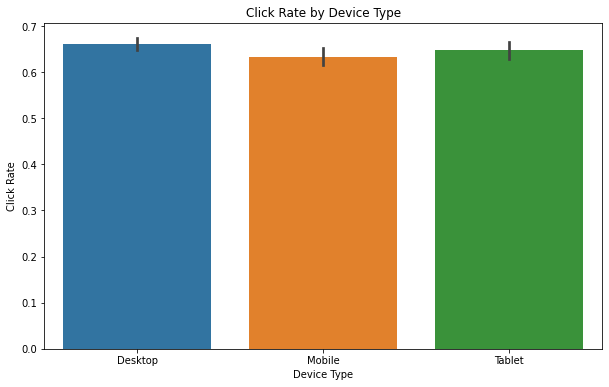

In [10]:
plt.figure(figsize=(10, 6))
sns.barplot(x='device_type', y='click', data=df)
plt.title('Click Rate by Device Type')
plt.xlabel('Device Type')
plt.ylabel('Click Rate')
plt.show()

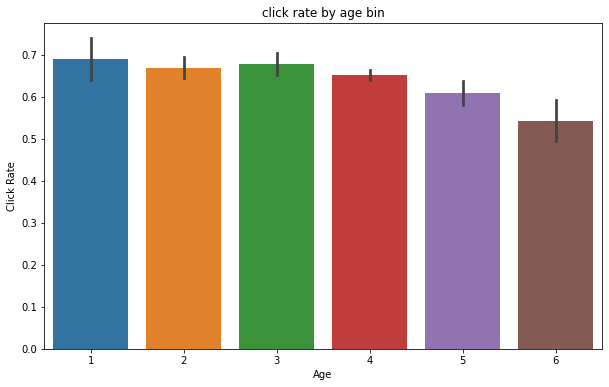

In [11]:
df['age_bin'] = pd.cut(df['age'], bins = [0,10,20,30,40,50,60,70,80,90,100],labels = False)
plt.figure(figsize = (10,6))
sns.barplot(x = 'age_bin', y = 'click', data =df)
plt.title('click rate by age bin')
plt.xlabel('Age')
plt.ylabel('Click Rate')
plt.show()

Models

In [12]:
df_encoded = pd.get_dummies(df, columns = ['gender',
                                          'device_type',
                                          'ad_position',
                                          'browsing_history',
                                          'time_of_day',
                                          ],
                           drop_first = True)

In [13]:
df_encoded

,id,full_name,age,click,age_bin,gender_Male,gender_Non-Binary,device_type_Mobile,device_type_Tablet,ad_position_Side,ad_position_Top,browsing_history_Entertainment,browsing_history_News,browsing_history_Shopping,browsing_history_Social Media,time_of_day_Evening,time_of_day_Morning,time_of_day_Night
0,670,User670,22.000000,1,2,0,0,0,0,0,1,0,0,1,0,0,0,0
1,3044,User3044,40.197363,1,4,1,0,0,0,0,1,1,0,0,0,0,1,0
2,5912,User5912,41.000000,1,4,0,1,0,0,1,0,0,0,0,0,0,0,1
3,5418,User5418,34.000000,1,3,1,0,0,0,0,0,1,0,0,0,1,0,0
4,9452,User9452,39.000000,0,3,0,1,0,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,8510,User8510,40.197363,0,4,0,0,1,0,0,1,0,0,0,0,0,1,0
9996,7843,User7843,40.197363,0,4,0,0,0,0,0,0,1,0,0,0,0,1,0
9997,3914,User3914,40.197363,0,4,1,0,1,0,1,0,1,0,0,0,0,1,0
9998,7924,User7924,40.197363,1,4,0,0,0,0,0,0,0,0,1,0,0,1,0


In [14]:
X = df_encoded.drop(['id','full_name'], axis = 1)
y = X.pop('click')
print(X.head())
print(y.head())

         age  age_bin  gender_Male  gender_Non-Binary  device_type_Mobile  \
0  22.000000        2            0                  0                   0   
1  40.197363        4            1                  0                   0   
2  41.000000        4            0                  1                   0   
3  34.000000        3            1                  0                   0   
4  39.000000        3            0                  1                   0   

   device_type_Tablet  ad_position_Side  ad_position_Top  \
0                   0                 0                1   
1                   0                 0                1   
2                   0                 1                0   
3                   0                 0                0   
4                   0                 0                0   

   browsing_history_Entertainment  browsing_history_News  \
0                               0                      0   
1                               1                      0

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size = 0.7, train_size = 0.3, random_state = 15)

In [31]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(random_state = 15)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


from sklearn.metrics import classification_report, accuracy_score
print(classification_report(y_test, y_pred.round()))
print("Accuracy:", accuracy_score(y_test, y_pred.round()))

              precision    recall  f1-score   support

           0       0.62      0.39      0.48      2450
           1       0.73      0.87      0.79      4550

    accuracy                           0.70      7000
   macro avg       0.67      0.63      0.64      7000
weighted avg       0.69      0.70      0.68      7000

Accuracy: 0.7031428571428572


In [35]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred.round())

In [ ]:
plt.figure(figsize = (10,6))
sns.heatmap(cm, annot = True, fmt  = 'd', cmap = "Reds", cbar =False
           xticklabel = ['Not Clicked','Clicked'], yticklabel = ['Not Clicked','Clicked'])
plt.xlabel("predicted")